the dataset is the Titanic dataset from kaggle.
The kaggle did not provide the ground-truth: real label for the test set, not it did not hurt this analysis, since the  it did not involve accuracy. 
First, binarize the categorical features for feature 'Pclass' and fill some missing value with mean value for corresponding columns.

In [45]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree as tree
from IPython.display import SVG
from graphviz import Source
from sklearn.preprocessing import StandardScaler
import pickle
import operator

In [46]:
df = pd.read_csv('train.csv')
df = pd.get_dummies(df, prefix= ['Pclass'],columns=['Pclass'])
df = df.replace(['male','female'],[1,0])
df = df.fillna(df.mean())
feat_lst = ['Sex','Age','SibSp','Parch','Pclass_1','Pclass_2','Pclass_3']

In [47]:
df_test = pd.read_csv('test.csv')
df_test = pd.get_dummies(df_test, prefix= ['Pclass'],columns=['Pclass'])
df_test = df_test.replace(['male','female'],[1,0])
df_test = df_test.fillna(df.mean())
X_train, y_train = df[feat_lst], df['Survived']
X_test = df_test[feat_lst]
print(X_train.head())
X_test.head()

   Sex   Age  SibSp  Parch  Pclass_1  Pclass_2  Pclass_3
0    1  22.0      1      0         0         0         1
1    0  38.0      1      0         1         0         0
2    0  26.0      0      0         0         0         1
3    0  35.0      1      0         1         0         0
4    1  35.0      0      0         0         0         1


,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,1,34.5,0,0,0,0,1
1,0,47.0,1,0,0,0,1
2,1,62.0,0,0,0,1,0
3,1,27.0,0,0,0,0,1
4,0,22.0,1,1,0,0,1


In [48]:
a = {}
a['X_train'] = X_train
a['y_train'] = y_train
a['X_test'] = X_test
a['target_names'] = ['Survived']
a['feature_names'] = ['Sex','Age','SibSp','Parch','Pclass_1','Pclass_2','Pclass_3']
pickle.dump(a, open("lliu54.pickle", "wb"))

4 important features
(1) Train an L2-regularized LogisticRegression classifier on the train split; use the default parameters for all, except penalty should be set to l2, Print the top 10 features and their weights 

In [49]:
lr_l2 =LogisticRegression(penalty='l2')
lr_l2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
def top_features(clf):
    lst = []
    feature_sorted = np.argsort(np.abs(clf.coef_[0]))[::-1]
    for i in feature_sorted:
        v = (feat_lst[i], round(float(clf.coef_[0][i]),3))
        lst.append(v)
    return lst

In [51]:
print('top features for un-scaled data with L2 penalty: ',top_features(lr_l2))

top features for un-scaled data with L2 penalty:  [('Sex', -2.595), ('Pclass_1', 1.739), ('Pclass_2', 0.646), ('Pclass_3', -0.449), ('SibSp', -0.3), ('Parch', -0.055), ('Age', -0.035)]


(2) Train an L1-regularized LogisticRegression classifier on the train split; use the default parameters for all, except penalty should be set to l1. Print the top 10 features and their weights

In [52]:
lr_l1 =LogisticRegression(penalty='l1')
lr_l1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
print('top features for un-scaled data with L1 penalty: ',top_features(lr_l1))

top features for un-scaled data with L1 penalty:  [('Sex', -2.677), ('Pclass_1', 2.244), ('Pclass_2', 1.091), ('SibSp', -0.311), ('Parch', -0.059), ('Age', -0.037), ('Pclass_3', 0.0)]


In [54]:
def penalty_change(weight_L1,weight_L2):
    lst1 = []
    for i in range(len(weight_L1)):
        u = (weight_L1[i][0],
             round(float(weight_L1[i][1]-weight_L2[i][1]),6))
        lst1.append(u)
    return lst1   

In [55]:
print('L1 VS L2 weight difference on un-scaled data:',penalty_change(top_features(lr_l1),top_features(lr_l2)))

L1 VS L2 weight difference on un-scaled data: [('Sex', -0.082), ('Pclass_1', 0.505), ('Pclass_2', 0.445), ('SibSp', 0.138), ('Parch', 0.241), ('Age', 0.018), ('Pclass_3', 0.035)]


(3)Train a DecisionTreeClassifier  on the train split; use the default parameters for all, except max_depth=6, min_impurity_decrease=0.005. Visualize the tree.

In [56]:
dt_unscaled = tree.DecisionTreeClassifier(max_depth=6, min_impurity_decrease =0.005)
dt_unscaled.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.005, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

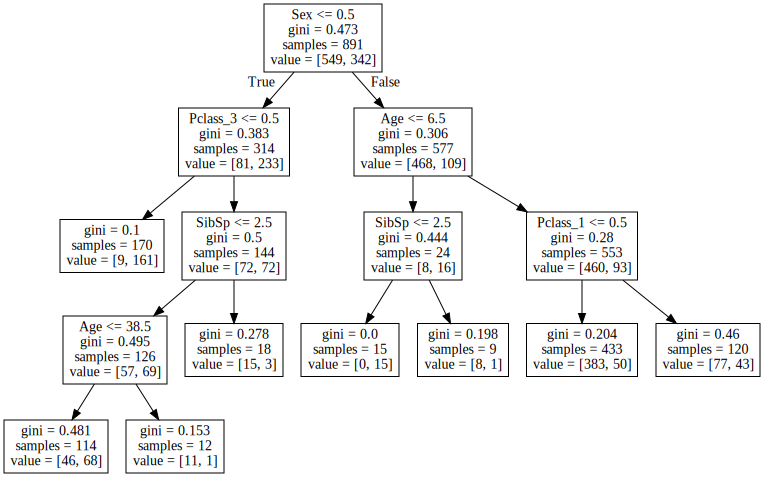

In [57]:
graph_unscaled = Source( tree.export_graphviz(dt_unscaled, out_file=None, feature_names=X_train.columns))
SVG(graph_unscaled.pipe(format='svg'))

(4) Discuss the result: For both LR results with L1 and L2: the top 3 features are:'Sex','Pclass_1', and 'Pclass_2'.This  The reuslts make sense: Under both two regularization circumstances, 'sex' is lower than -2, which means males are much more likely to die, whereas females are more likely to survive. More Males possibly gave the chance of survivl to females. Wealthy people who can afford higher class were more likely to take the saft boats. We should also notice that, L2 usually penalize the higher weights more than L1 does, so L1 gives all those three features more values in magnitutde ('Sex'-0.082, 'Pclass_1', 0.506, 'Pclass_2', 0.445) But compared with decision tree approach,LR approach might miss out one important feature: age. LR gives age a too low weight. Not only females, but also children are more likely to survive. Aother thing should be noticed is decision tree use the Pclass3 as a spliting condition, we need to check if it is caused by imbalanced data distribution: maybe more females were at Pclass3, because it conflicts with the second important feature: Pclass1 in LR approach. And for L1 and L2, a more conservative way is to use L2, L1 gives top2 features too much weights after checking with decision tree.

(5) z-score all features using StandardScaler. z-score both train and test. use fit_transform on train, and transform on test.

In [58]:
scaler = StandardScaler().fit(X_train[['Age','SibSp','Parch']])
z_data = scaler.transform(X_train[['Age','SibSp','Parch']])
dataframe=pd.DataFrame(z_data, columns=['Age','SibSp','Parch']) 
scaled_train = dataframe.join(X_train[['Sex','Pclass_1','Pclass_2','Pclass_3']])
scaled_train.head()

,Age,SibSp,Parch,Sex,Pclass_1,Pclass_2,Pclass_3
0,-0.592481,0.432793,-0.473674,1,0,0,1
1,0.638789,0.432793,-0.473674,0,1,0,0
2,-0.284663,-0.474545,-0.473674,0,0,0,1
3,0.407926,0.432793,-0.473674,0,1,0,0
4,0.407926,-0.474545,-0.473674,1,0,0,1


In [59]:
scaler_test = StandardScaler().fit(X_test[['Age','SibSp','Parch']])
z_data_test = scaler_test.transform(X_test[['Age','SibSp','Parch']])
dataframe_test=pd.DataFrame(z_data_test, columns=['Age','SibSp','Parch']) 
scaled_test = dataframe_test.join(X_test[['Sex','Pclass_1','Pclass_2','Pclass_3']])
scaled_test.head()

,Age,SibSp,Parch,Sex,Pclass_1,Pclass_2,Pclass_3
0,0.344284,-0.499470,-0.400248,1,0,0,1
1,1.334655,0.616992,-0.400248,0,0,0,1
2,2.523099,-0.499470,-0.400248,1,0,1,0
3,-0.249938,-0.499470,-0.400248,1,0,0,1
4,-0.646086,0.616992,0.619896,0,0,0,1


In [60]:
a_scaled = {}
a_scaled['X_train'] = scaled_train
a_scaled['y_train'] = y_train
a_scaled['X_test'] = scaled_test
a_scaled['target_names'] = ['Survived']
a_scaled['feature_names'] = ['Sex','Age','SibSp','Parch','Pclass_1','Pclass_2','Pclass_3']
pickle.dump(a_scaled, open("lliu54_scaled.pickle", "wb"))

(6) Repeat steps 1-4 (i.e., train L2-LR, print top 10 features and their weights, and so on) using the scaled version of the data and discuss the results.

(a) Train an L2-regularized LogisticRegression classifier on scaled data, find top features.

In [61]:
lr_l2scaled =LogisticRegression(penalty='l2')
lr_l2scaled.fit(scaled_train,y_train)
print('top features for scaled data with L2 penalty: ',top_features(lr_l2scaled))

top features for scaled data with L2 penalty:  [('Parch', -2.627), ('Pclass_1', 1.468), ('Pclass_3', -0.767), ('Sex', -0.497), ('Age', -0.35), ('Pclass_2', 0.345), ('SibSp', -0.053)]


(b) Train an L1-regularized LogisticRegression classifier on scaled data, find top features.

In [62]:
lr_l1scaled =LogisticRegression(penalty='l1')
lr_l1scaled.fit(scaled_train,y_train)
print('top features for scaled data with L1 penalty: ',top_features(lr_l1scaled))

top features for scaled data with L1 penalty:  [('Parch', -2.685), ('Pclass_1', 2.238), ('Pclass_2', 1.072), ('Sex', -0.496), ('Age', -0.35), ('SibSp', -0.053), ('Pclass_3', -0.022)]


In [63]:
print('L1 VS L2 weight difference on scaled data:',penalty_change(top_features(lr_l1scaled),top_features(lr_l2scaled)))

L1 VS L2 weight difference on scaled data: [('Parch', -0.058), ('Pclass_1', 0.77), ('Pclass_2', 1.839), ('Sex', 0.001), ('Age', 0.0), ('SibSp', -0.398), ('Pclass_3', 0.031)]


(c) train a decision tree on scaled data, print the tree

In [64]:
dt_scaled = tree.DecisionTreeClassifier(max_depth=6, min_impurity_decrease =0.005)
dt_scaled.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.005, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

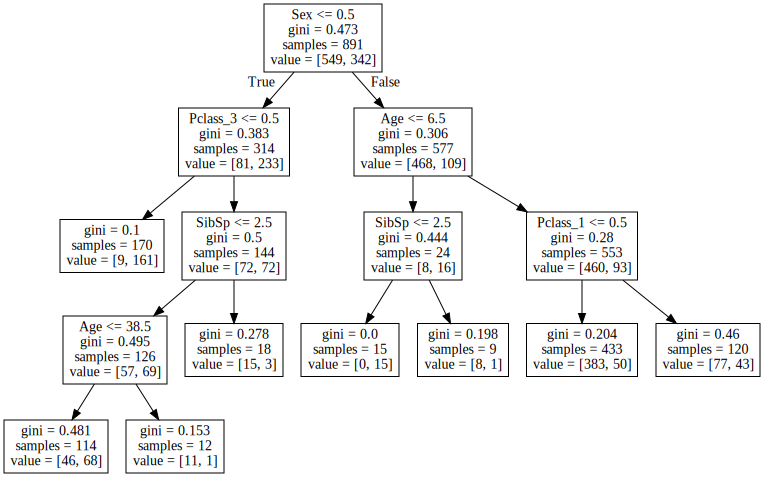

In [65]:
graph_scaled = Source( tree.export_graphviz(dt_scaled, out_file=None, feature_names=X_train.columns))
SVG(graph_scaled.pipe(format='svg'))

(d) discuss the result:For both LR results with L1 and L2: the top 2 features are:'Parch','Pclass_1', the third important feature is Pclass2 or Pclass3. The reuslts does not quite make sense: because the acutal colomn for Parch is relatively sparse: not so many people were staying there with their parents or children. Standardizing this column values might cause miss-leading result: more parch, more burden in the disaster, more likely failed to escape! Picking up Pclass1 make sense. For the third important feature, medium positive Pclass2 can approximate a negative Plcass3,this is actually a multicollinearity issue: only three Pclass to be features, two of them can infer the rest one, we should delete one Pclass to avoid this situation. For the decision tree, the result is same. It make sense, for a approach which does not invovle any mathematical manipulation, all changed features actually change to a 'same' extent, the spliting conditions won't change.

5,Evidence
find objects: The most positive object with respect to the probabilities.
The most negative object with respect to the probabilities.
The object that has the largest positive evidence.
The object that has the largest (in magnitude) negative evidence.
The most uncertain object (the probabilities are closest to 0.5)

In [66]:
proba = lr_l2scaled.predict_proba(scaled_test)
log_proba = lr_l2scaled.predict_log_proba(scaled_test)
print('most positive object and its positive probability:', np.argsort(proba[:,1])[[-1]],np.sort(proba[:,1])[-1])
print('most negative object and its negative probability:', np.argsort(proba[:,0])[[-1]],np.sort(proba[:,0])[-1])

most positive object and its positive probability: [231] 0.955630883762
most negative object and its negative probability: [360] 0.991581770363


Multiply values of features and their corresponding weights to get the evidence matrix: 

In [67]:
value_matrix = scaled_test.values
evid_mtr = np.multiply(value_matrix,lr_l2scaled.coef_[0])

In [68]:
proba[231]

array([ 0.04436912,  0.95563088])

Create each object's positive evidence and negative evidence:

In [69]:
pos_evid = [0] * evid_mtr.shape[0]
neg_evid = [0] * evid_mtr.shape[0]
for i in range(evid_mtr.shape[0]):
    for j in range(evid_mtr.shape[1]):
        if evid_mtr[i,j] > 0:
            pos_evid[i] += evid_mtr[i,j]
        else:
            neg_evid[i] += evid_mtr[i,j]

1 and 2 

For both the most positive object with respect to the probabilities and the most negative object with respect to the probabilities.

a) the total positive evidence,  b) the total negative evidence, c) probability distribution

In [70]:
print('the total positive evidence for most positive object:',pos_evid[231])
print('the total negative evidence for most positive object:',neg_evid[231])
print('the probability distribution for most positive object:',proba[231])

the total positive evidence for most positive object: 2.02434219626
the total negative evidence for most positive object: 0.0
the probability distribution for most positive object: [ 0.04436912  0.95563088]


In [71]:
print('the total positive evidence for most negative object:',pos_evid[360])
print('the total negative evidence for most negative object:',neg_evid[360])
print('the probability distribution for most negative object:',proba[360])

the total positive evidence for most negative object: 0.616673733698
the total negative evidence for most negative object: -6.43106149058
the probability distribution for most negative object: [ 0.99158177  0.00841823]


In [72]:
def obj_dic(obj):
    dict = {}
    for i in range(len(scaled_test.columns)):
        dict[scaled_test.columns[i]] = obj[i]
    return sorted(dict.items(), key=operator.itemgetter(1))

For most positive object:
d) top 3 feature values that contribute most to the positive evidence, e) top 3 feature values that contribute the most to the negative evidence.

In [73]:
print('top 3 feature values that contribute most to the positive evidence:',
      sorted(obj_dic(evid_mtr[231]), key = lambda x:x[1], reverse = True)[:3])

top 3 feature values that contribute most to the positive evidence: [('Pclass_1', 1.4676810302516821), ('Age', 0.36062257545060616), ('SibSp', 0.17470551145652324)]


In [74]:
print('top 3 feature values that contribute most to the negative evidence:',obj_dic(evid_mtr[231])[:3])

top 3 feature values that contribute most to the negative evidence: [('Sex', -0.0), ('Pclass_3', -0.0), ('Pclass_2', 0.0)]


For most negative object: d) top 3 feature values that contribute most to the positive evidence, e) top 3 feature values that contribute the most to the negative evidence.

In [75]:
print('top 3 feature values that contribute most to the positive evidence:',
      sorted(obj_dic(evid_mtr[360]), key = lambda x:x[1], reverse = True)[:3])

top 3 feature values that contribute most to the positive evidence: [('Age', 0.61667373369757073), ('Pclass_1', 0.0), ('Pclass_2', 0.0)]


In [76]:
print('top 3 feature values that contribute most to the negative evidence:',obj_dic(evid_mtr[360])[:3])

top 3 feature values that contribute most to the negative evidence: [('SibSp', -2.9494401051777746), ('Sex', -2.6267890000122485), ('Pclass_3', -0.76741879296754512)]


3 For the object that has the largest positive evidence.

print a) the total positive evidence,  b) the total negative evidence, c) probability distribution, 


In [77]:
pos_idx, pos_obj = max(enumerate(pos_evid), key=operator.itemgetter(1))
neg_idx, neg_obj= min(enumerate(neg_evid), key=operator.itemgetter(1))

In [78]:
print('The object that has the largest positive evidence and its total positive evidence:',pos_idx, pos_obj) 

The object that has the largest positive evidence and its total positive evidence: 196 2.59389640542


In [79]:
print('the total positive evidence for the object that has the largest positive evidence:',pos_evid[196])
print('the total negative evidence for the object that has the largest positive evidence:',neg_evid[196])
print('the probability distribution for the object that has the largest positive evidence:',proba[196])

the total positive evidence for the object that has the largest positive evidence: 2.59389640542
the total negative evidence for the object that has the largest positive evidence: -2.71420259243
the probability distribution for the object that has the largest positive evidence: [ 0.28390367  0.71609633]


For object has the largest positive evidence: d) top 3 feature values that contribute most to the positive evidence, e) top 3 feature values that contribute the most to the negative evidence.

In [80]:
print('top 3 feature values that contribute most to the positive evidence:',
      sorted(obj_dic(evid_mtr[196]), key = lambda x:x[1], reverse = True)[:3])
print('top 3 feature values that contribute most to the negative evidence:',obj_dic(evid_mtr[196])[:3])

top 3 feature values that contribute most to the positive evidence: [('Pclass_1', 1.4676810302516821), ('Age', 0.95150986371283208), ('SibSp', 0.17470551145652324)]
top 3 feature values that contribute most to the negative evidence: [('Sex', -2.6267890000122485), ('Parch', -0.087413592418601249), ('Pclass_3', -0.0)]


4 
For object that has the largest (in magnitude) negative evidence.

print a) the total positive evidence,  b) the total negative evidence, c) probability distribution, 


In [81]:
print('The object that has the largest (in magnitude) negative evidence and its total negative evidence:',neg_idx, neg_obj)

The object that has the largest (in magnitude) negative evidence and its total negative evidence: 360 -6.43106149058


In [82]:
print('the total positive evidence for the object that has the largest negative evidence:',pos_evid[360])
print('the total negative evidence for the object that has the largest negative evidence:',neg_evid[360])
print('the probability distribution for the object that has the largest negative evidence:',proba[360])

the total positive evidence for the object that has the largest negative evidence: 0.616673733698
the total negative evidence for the object that has the largest negative evidence: -6.43106149058
the probability distribution for the object that has the largest negative evidence: [ 0.99158177  0.00841823]


For object has the largest negative evidence: d) top 3 feature values that contribute most to the positive evidence, e) top 3 feature values that contribute the most to the negative evidence.

In [83]:
print('top 3 feature values that contribute most to the positive evidence:',
      sorted(obj_dic(evid_mtr[360]), key = lambda x:x[1], reverse = True)[:3])
print('top 3 feature values that contribute most to the negative evidence:',obj_dic(evid_mtr[360])[:3])

top 3 feature values that contribute most to the positive evidence: [('Age', 0.61667373369757073), ('Pclass_1', 0.0), ('Pclass_2', 0.0)]
top 3 feature values that contribute most to the negative evidence: [('SibSp', -2.9494401051777746), ('Sex', -2.6267890000122485), ('Pclass_3', -0.76741879296754512)]


Check the total evidence of objects:

In [84]:
total_evid = pos_evid[:]
for i in range(len(neg_evid)):
    total_evid[i] += neg_evid[i]
    
totalMax_idx, totalMax_obj = max(enumerate(total_evid), key=operator.itemgetter(1))
totalMin_idx, totalMin_obj = min(enumerate(total_evid), key=operator.itemgetter(1))

In [85]:
print('The obj with total max evidence',totalMax_idx, totalMax_obj)

The obj with total max evidence 231 2.02434219626


In [86]:
print('The obj with total min evidence',totalMin_idx, totalMin_obj)

The obj with total min evidence 360 -5.81438775688


This result is consistent with the result created by predict probability

5, The most uncertain object:it has eaqul probabilities of 0 and 1.

print a) the total positive evidence,  b) the total negative evidence, c) probability distribution, d) top 3 feature values that contribute most to the positive evidence, e) top 3 feature values that contribute the most to the negative evidence.

In [87]:
diff_lst = []
for i in range(len(proba)):
    v = proba[i,0]-proba[i,1]
    diff_lst.append((i,np.abs(v)))
diff_lst.sort(key = lambda x:x[1])
print('The most uncertain object:',diff_lst[0])

The most uncertain object: (33, 0.0036082240768029461)


In [88]:
print('the total positive evidence for the most uncertain object:',pos_evid[33])
print('the total negative evidence for the most uncertain object:',neg_evid[33])
print('the probability distribution for the most uncertain object:',proba[33])
print('top 3 feature values that contribute most to the positive evidence:',
      sorted(obj_dic(evid_mtr[33]), key = lambda x:x[1], reverse = True)[:3])
print('top 3 feature values that contribute most to the negative evidence:',obj_dic(evid_mtr[33])[:3])

the total positive evidence for the most uncertain object: 0.0179427063343
the total negative evidence for the most uncertain object: -1.07064507601
the probability distribution for the most uncertain object: [ 0.50180411  0.49819589]
top 3 feature values that contribute most to the positive evidence: [('Age', 0.017942706334297627), ('Sex', -0.0), ('Pclass_1', 0.0)]
top 3 feature values that contribute most to the negative evidence: [('Pclass_3', -0.76741879296754512), ('SibSp', -0.21581269062276398), ('Parch', -0.087413592418601249)]
